In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir("../")

%matplotlib notebook
import matplotlib.pylab as plt
# pylab.rcParams['figure.figsize'] = (10, 5)

In [2]:
import ld_gan
from ld_gan import visualize
import numpy as np

# load data

In [3]:
X, Y = ld_gan.data_proc.data_loader.load_data(2, n_jobs=10, resize = 64)

100%|██████████| 202599/202599 [09:44<00:00, 346.42it/s] 


In [8]:
yc = np.zeros(len(X))

# visualize

loaded model 'projects/xc_11111_s10l.py/model/e_0010.pth'
loaded model 'projects/xc_11111_s10l.py/model/e_0010.pth'
loaded model 'projects/xc_11111_s10l.py/model/g_0010.pth'
loaded model 'projects/xc_11111_s10l.py/model/g_0010.pth'
loaded model 'projects/xc_11111_s10l.py/model/d_0010.pth'
loaded model 'projects/xc_11111_s10l.py/model/d_0010.pth'


<IPython.core.display.Javascript object>


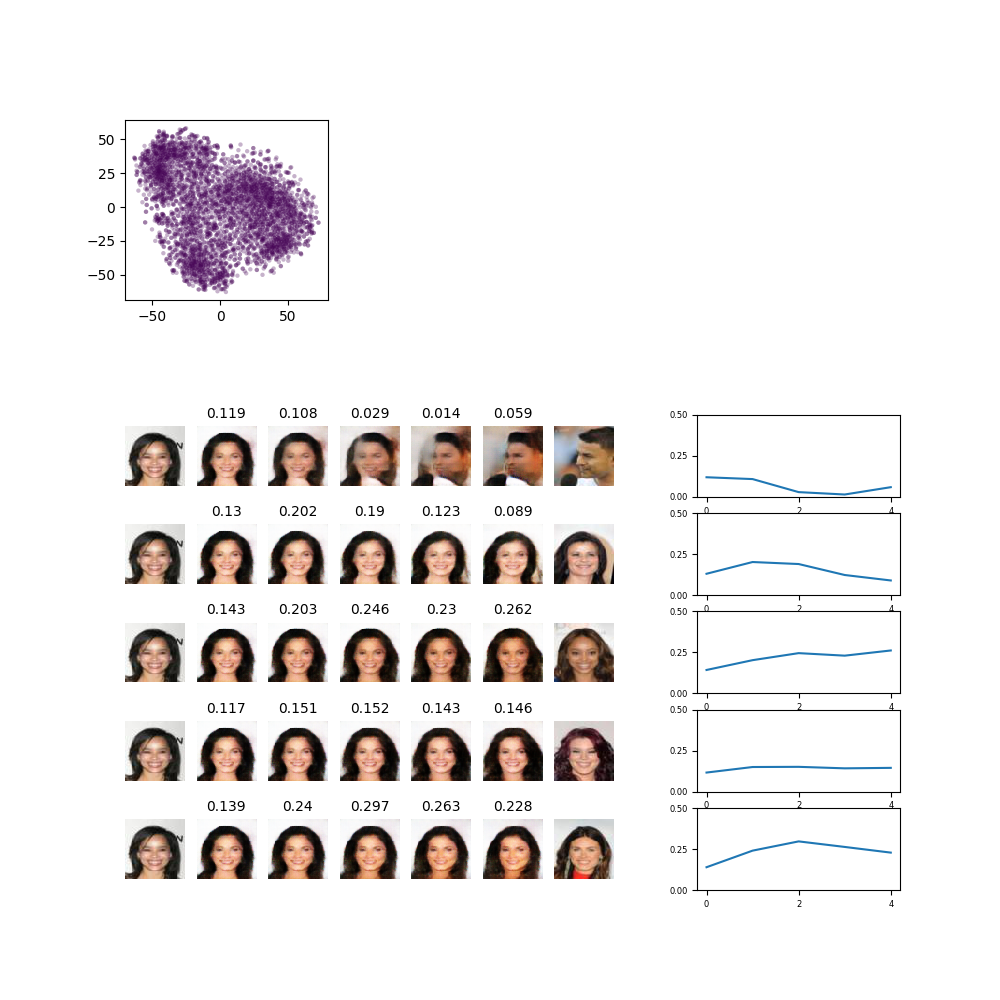

In [16]:
visualize.tiplet_nn(X, yc, 
                    "xc_11111_s10l.py", 
                    10,  
                    n_neighbors = 5,
                    sampler=None,
                    alpha = 0.3,
                    n_pts_tsne = 4000,
                    real_img_mode = "all+mean")

loaded model 'projects/xc_11111_s10l.py/model/e_0030.pth'
loaded model 'projects/xc_11111_s10l.py/model/e_0030.pth'
loaded model 'projects/xc_11111_s10l.py/model/g_0030.pth'
loaded model 'projects/xc_11111_s10l.py/model/g_0030.pth'
compute tsne...


<IPython.core.display.Javascript object>


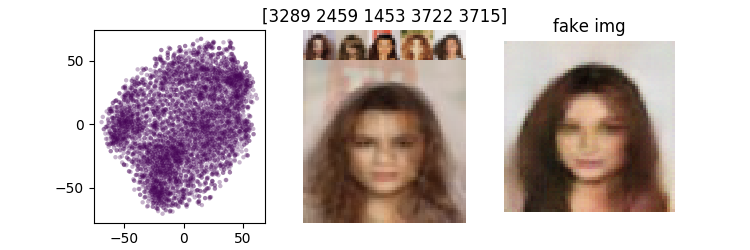

In [19]:
visualize.tsne_real_fake_vis(X, yc, 
                             "xc_11111_s10l.py", 
                             30,  
                             z_mapped = None,
                             n_neighbors = 5,
                             sampler=None,
                             alpha = 0.3,
                             n_pts_tsne = 4000,
                             real_img_mode = "all+mean")

loaded model 'projects/xc_11111_s10l.py/model/e_0030.pth'
loaded model 'projects/xc_11111_s10l.py/model/e_0030.pth'
loaded model 'projects/xc_11111_s10l.py/model/g_0030.pth'
loaded model 'projects/xc_11111_s10l.py/model/g_0030.pth'


<IPython.core.display.Javascript object>


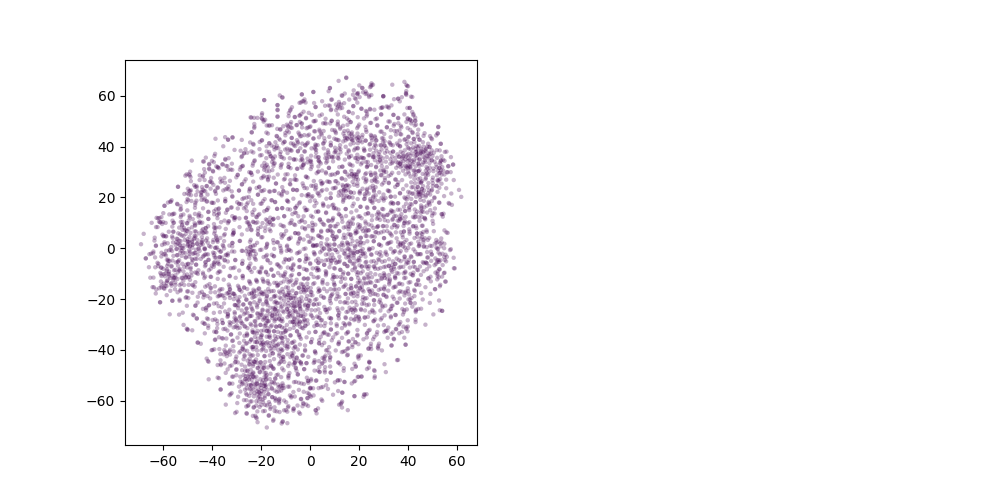

In [25]:
#xf_11110_vggenc_lr.py
visualize.tsne_to_interpol_arr(X, yc,  
                               "xc_11111_s10l.py", 
                               30,  
                               z_mapped = None,
                               n_neighbors = 4,
                               sampler=None,
                               alpha = 0.3,
                               n_pts_tsne = 4000,
                               real_img_mode = "all+mean",
                               small = False
                              )

# check overfitting

In [10]:
project, epoch = "xc_11111_s10l.py", 10
enc = ld_gan.utils.model_handler.load_model(project, epoch, "enc")
gen = ld_gan.utils.model_handler.load_model(project, epoch, "gen")
dis = ld_gan.utils.model_handler.load_model(project, epoch, "dis")

loaded model 'projects/xc_11111_s10l.py/model/e_0010.pth'
loaded model 'projects/xc_11111_s10l.py/model/e_0010.pth'
loaded model 'projects/xc_11111_s10l.py/model/g_0010.pth'
loaded model 'projects/xc_11111_s10l.py/model/g_0010.pth'
loaded model 'projects/xc_11111_s10l.py/model/d_0010.pth'
loaded model 'projects/xc_11111_s10l.py/model/d_0010.pth'


In [11]:
X_flip = [np.fliplr(x) for x in X]

In [12]:
ds_flip = ld_gan.utils.model_handler.apply_models(X_flip, 500, enc, gen, dis)
ds = ld_gan.utils.model_handler.apply_models(X, 500, enc, gen, dis)

In [13]:
print "training data:", ds.mean()
print "testing data:", ds_flip.mean()

training data: 0.213971
testing data: 0.211218
